In [1]:
%load_ext autoreload
%autoreload 2

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
import pdb
from pseudopy.nonnormal import NonnormalAuto, NonnormalPoints
from pseudopy.normal import Normal
from glob import glob

In [5]:
import sys
sys.path.append('../..')

In [11]:
from loaders import load_sabes, load_peanut
from neurosim.models.varma import form_companion

### Load Sabes and plot the pseudospectra

In [8]:
data_files = glob('/mnt/Secondary/data/sabes/*.mat')
dat = load_sabes(data_files[0])

Processing spikes


100%|██████████| 1/1 [00:16<00:00, 16.67s/it]


In [9]:
# Fit VAR(3)
from pyuoi.linear_model.var import VAR

In [10]:
varmodel = VAR(order=3, estimator='ols')
varmodel.fit(np.squeeze(dat['spike_rates']))

Rows of VAR matrix processed: 186it [00:51,  3.61it/s]


In [12]:
A = form_companion(varmodel.coef_)

AttributeError: 'NoneType' object has no attribute 'get_view_interval'

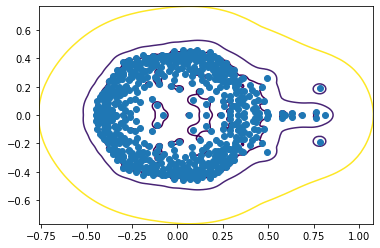

In [13]:
pseudo = NonnormalAuto(A, 1e-5, 1)

In [18]:
pseudo.triang.triangles.size

1236996

In [23]:
len(pseudo.vals)

223200

In [19]:
pseudo.triang.x

array([  0.68530628,   0.68530513,   0.68530314, ..., 192.49880004,
       202.64379463, 192.94160703])

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

In [47]:
class MplColorHelper:

  def __init__(self, cmap_name, start_val, stop_val):
    self.cmap_name = cmap_name
    self.cmap = plt.get_cmap(cmap_name)
    self.norm = mpl.colors.Normalize(vmin=start_val, vmax=stop_val)
    self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

  def get_rgb(self, val):
    return self.scalarMap.to_rgba(val)

In [51]:
levels

[1e-05, 0.0001, 0.001, 0.01, 0.1]

In [81]:
# Equivalent spectrum of normal A
pseudo_normal = Normal(A)

In [91]:
tc.collections[0]

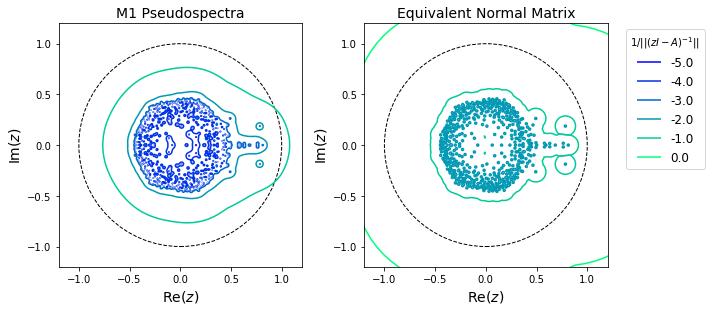

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
levels=[10**k for k in range(-5, 1)]

cmaphelper = MplColorHelper('winter', np.log(levels[0]), 10 * np.log(levels[-1]))
ax[0].set_aspect('equal')
ax[0].tricontour(pseudo.triang, pseudo.vals, levels=levels, colors=[cmaphelper.get_rgb(np.log(l)) for l in levels])

# Add stability circle
circle1 = plt.Circle((0, 0), 1, color='k', fill=False, linestyle='--')
ax[0].add_patch(circle1)

ax[0].set_xlim([-1.2, 1.2])
ax[0].set_ylim([-1.2, 1.2])

ax[0].set_ylabel('Im' + r'$(z)$', fontsize=14)
ax[0].set_yticks([-1., -0.5, 0, 0.5, 1.])

ax[0].set_xlabel('Re' + r'$(z)$', fontsize=14)
ax[0].set_xticks([-1., -0.5, 0, 0.5, 1.])

# Color background
ax[1].set_aspect('equal')

epsilons = levels
padepsilons = [epsilons[0]*0.9] + epsilons + [epsilons[-1]*1.1]
X = []
Y = []
Z = []
for epsilon in padepsilons:
    paths = pseudo_normal.contour_paths(epsilon)
    for path in paths:
        X += list(np.real(path.vertices[:-1]))
        Y += list(np.imag(path.vertices[:-1]))
        Z += [epsilon] * (len(path.vertices) - 1)

tc = ax[1].tricontour(X, Y, Z, levels=epsilons,  colors=[cmaphelper.get_rgb(np.log(l)) for l in levels])
for i in range(len(levels)):
    tc.collections[i].set_label(np.log10(levels[i]))
circle1 = plt.Circle((0, 0), 1, color='k', fill=False, linestyle='--')
ax[1].add_patch(circle1)

ax[1].set_xlim([-1.2, 1.2])
ax[1].set_ylim([-1.2, 1.2])

ax[1].set_ylabel('Im' + r'$(z)$', fontsize=14)
ax[1].set_yticks([-1., -0.5, 0, 0.5, 1.])

ax[1].set_xlabel('Re' + r'$(z)$', fontsize=14)
ax[1].set_xticks([-1., -0.5, 0, 0.5, 1.])

ax[1].legend(bbox_to_anchor=(1.05, 1), title=r'$1/||(zI - A)^{-1}||$', fontsize=12)

ax[0].set_title('M1 Pseudospectra', fontsize=14)
ax[1].set_title('Equivalent Normal Matrix', fontsize=14)

fig.tight_layout()
fig.savefig('/home/akumar/nse/neural_control/notebooks/pseudospectra.pdf', bbox_inches='tight', pad_inches=0)


(-1.1, 1.1)

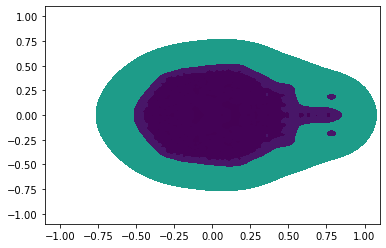

In [30]:
plt.tricontourf(pseudo.triang, pseudo.vals, levels=[10**k for k in range(-5, 0)])
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])

AttributeError: 'NoneType' object has no attribute 'get_view_interval'

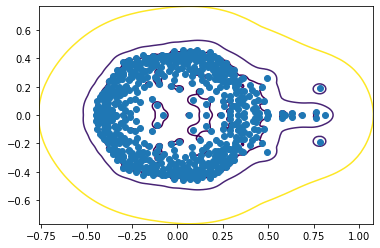

In [14]:
pseudo.plot([10**k for k in range(-5, 0)], spectrum=np.linalg.eigvals(A))